<a href="https://colab.research.google.com/github/Advanced-Data-Science-TU-Berlin/Data-Science-Training-Python-Part-2/blob/main/interactive_notebooks/4_1_2_Titanic_Survival_KNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Titanic: Machine Learning from Disaster
![picture](https://creazilla-store.fra1.digitaloceanspaces.com/cliparts/1722941/titanic-clipart-md.png)

The Titanic dataset is a well-known dataset in the field of data science and machine learning. It contains information about passengers on the Titanic, including whether they survived or not. Here are the details about the columns in the dataset:

- PassengerId: A unique identifier for each passenger.
- Survived: Indicates whether the passenger survived (1) or not (0).
- Pclass: Ticket class (1st, 2nd, or 3rd).
- Name: Passenger's name.
- Sex: Passenger's gender (male or female).
- Age: Passenger's age.
- SibSp: Number of siblings/spouses aboard.
- Parch: Number of parents/children aboard.
- Ticket: Ticket number.
- Fare: Passenger fare.
- Cabin: Cabin number.
- Embarked: Port of embarkation (C = Cherbourg, Q = Queenstown, S = Southampton).

The primary goal of working with this dataset is often to predict whether a passenger survived based on other features. It's a binary classification problem, where 'Survived' is the target variable.

## Insights and Considerations:
- Missing Values: The dataset may have missing values, especially in columns like 'Age,' 'Cabin,' and 'Embarked.' Handling missing values is an important part of preprocessing.

- Categorical Features: Features like 'Sex' and 'Embarked' are categorical. These need to be converted to numerical values for machine learning algorithms.

- Feature Engineering: Creating new features or modifying existing ones can enhance the predictive power of the model. For example, creating a 'FamilySize' feature by combining 'SibSp' and 'Parch' might be useful.

- Exploratory Data Analysis (EDA): EDA helps in understanding the distribution of data, identifying patterns, and making informed decisions during preprocessing.


In [ ]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Load the Titanic dataset
url = "https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv"
titanic_df = pd.read_csv(url)

# Display the first few rows of the dataset
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## Exploratory Data Analysis (EDA)

In [ ]:
# Explore the dataset

# Basic Information
print(titanic_df.info())

# Summary Statistics
print(titanic_df.describe())

# Check for missing values
print(titanic_df.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None
       PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  714.000000  891.000000   
mean    446.000000    0.383838    2.308642   29.699118    0.523008   
std     257.353842    0.48659

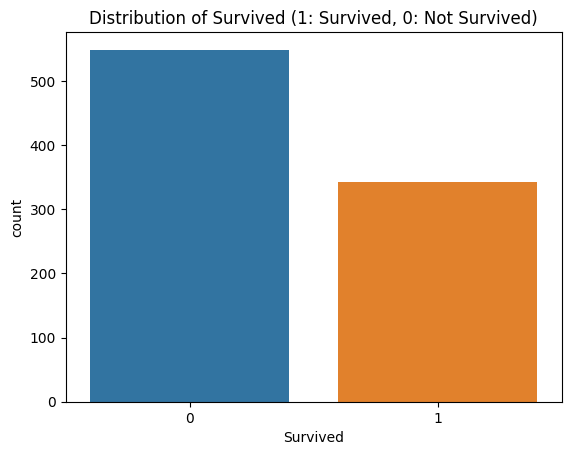

In [ ]:
# Visualize the distribution of the target variable 'Survived'
sns.countplot(x='Survived', data=titanic_df)
plt.title('Distribution of Survived (1: Survived, 0: Not Survived)')
plt.show()

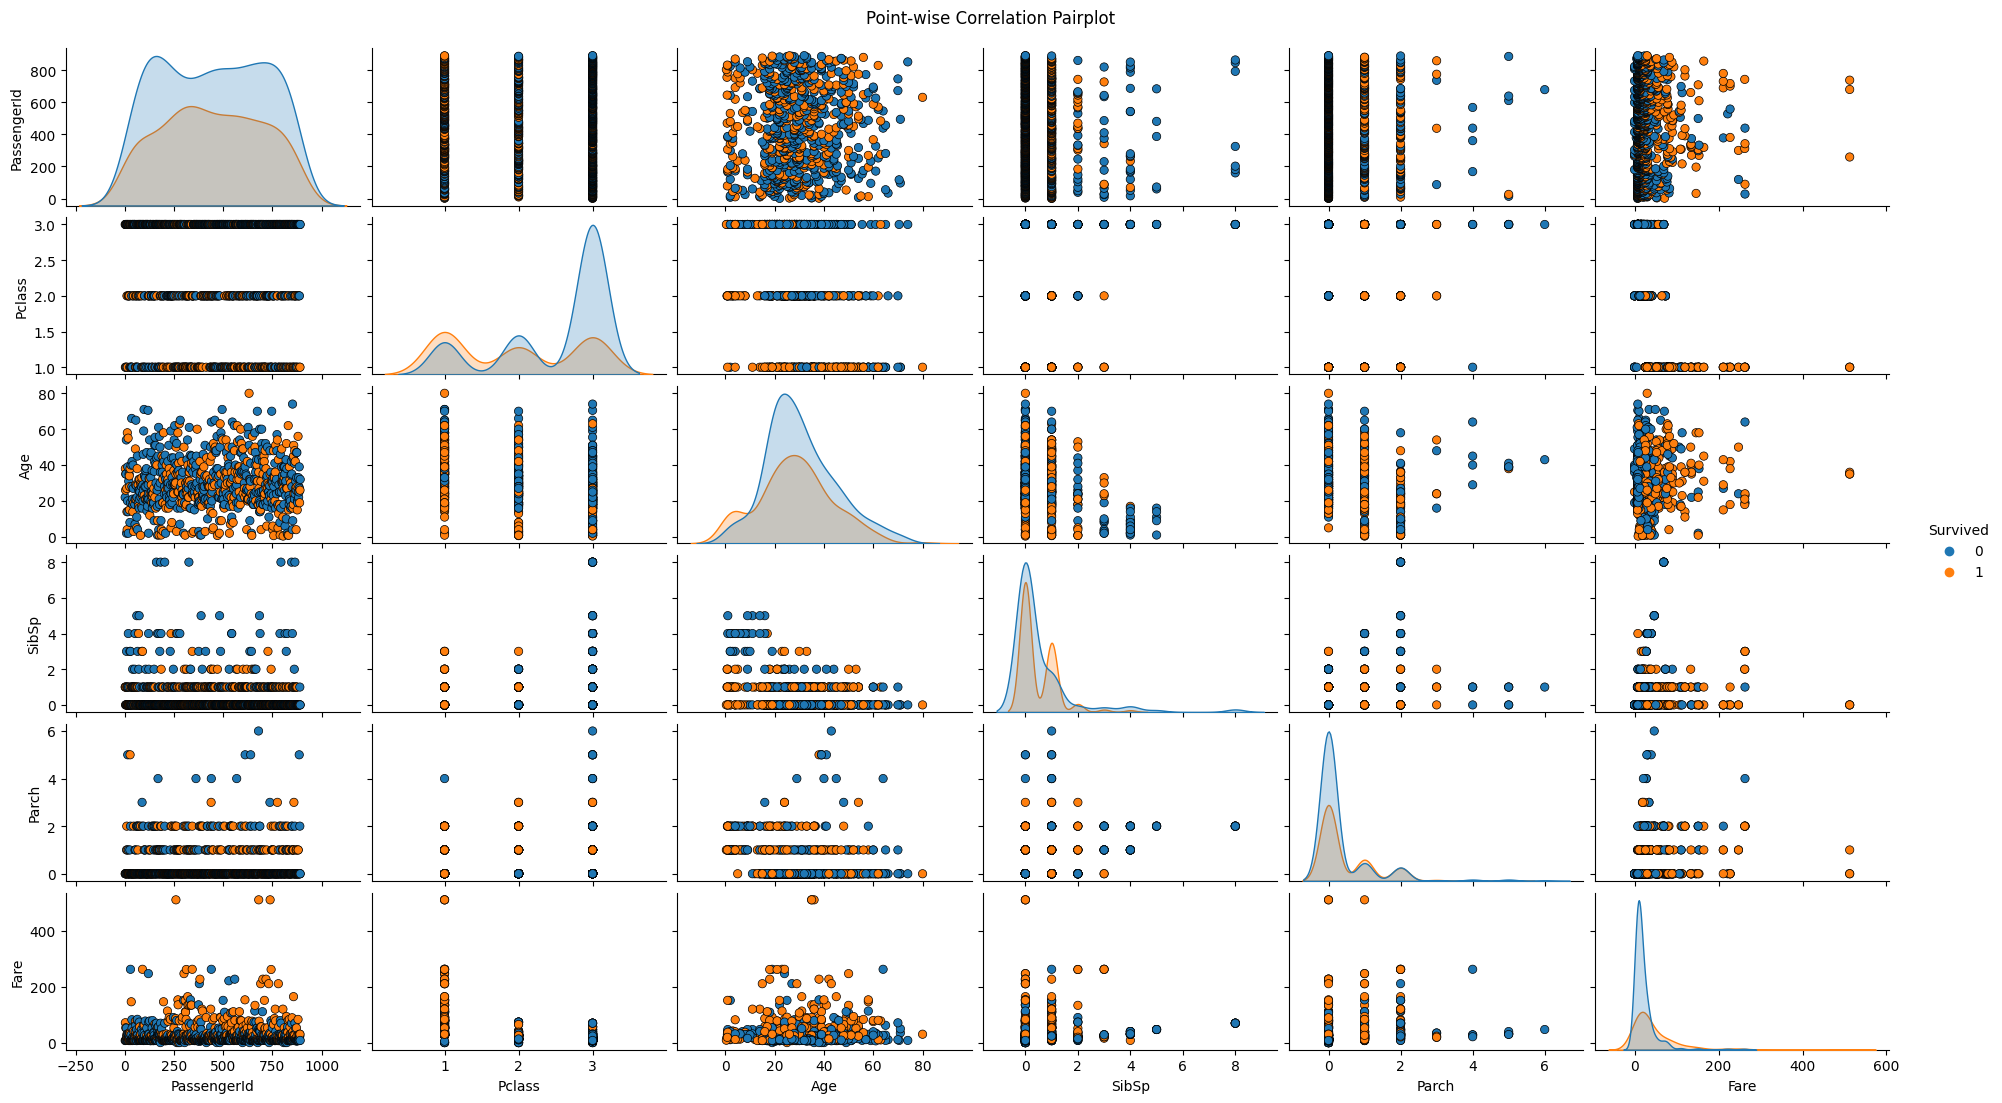

In [ ]:
# Point-wise Correlation Pairplot

# Select numerical columns for correlation pairplot
numerical_cols = titanic_df.select_dtypes(include=[np.number]).columns

# Create a point-wise correlation pairplot
sns.pairplot(titanic_df[numerical_cols], hue='Survived', height=1.8,
                  aspect=1.8, plot_kws=dict(edgecolor="k",
                  linewidth=0.5), diag_kind="kde")
plt.suptitle("Point-wise Correlation Pairplot", y=1.02)
plt.show()

In [ ]:
# Handle missing values

# Drop 'Cabin' column due to high missing values
titanic_df = titanic_df.drop('Cabin', axis=1)

# Fill missing values in 'Age' with the median
titanic_df['Age'].fillna(titanic_df['Age'].median(), inplace=True)

# Fill missing values in 'Embarked' with the mode
titanic_df['Embarked'].fillna(titanic_df['Embarked'].mode()[0], inplace=True)

In [ ]:
# Handle categorical features

# Convert 'Sex' to numerical values (0 for Female, 1 for Male)
titanic_df['Sex'] = titanic_df['Sex'].map({'female': 0, 'male': 1})

# Convert 'Embarked' to numerical values using one-hot encoding
titanic_df = pd.get_dummies(titanic_df, columns=['Embarked'], drop_first=True)

## Feature Selection

In [ ]:
# Select relevant features for classification
X = titanic_df[['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked_Q', 'Embarked_S']]
y = titanic_df['Survived']

## Train/Test Split
Let's split the data into train and test sets. In sklearn.model_selection package there is a function to do so which makes our lives easier. Remember you can also split data manually.

In [ ]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Feature Scaling

Feature scaling is crucial in K-Nearest Neighbors (KNN) and many other machine learning algorithms because it helps ensure that all features contribute equally to the distance computations. In the case of KNN, the algorithm classifies a data point by considering the majority class among its k nearest neighbors. The "distance" between data points is typically measured using metrics like Euclidean distance.

Here's why feature scaling is important in the context of KNN:

- Distance Computation: KNN relies on the concept of proximity or distance between data points. Features with larger scales or ranges may dominate the distance computation compared to features with smaller scales. This can lead to biased predictions.

- Uniform Contribution: Scaling features to a similar range ensures that each feature contributes more uniformly to the distance metric. Without scaling, a feature with a larger scale could overshadow the influence of other features.

- Equal Importance: Scaling is essential when the features are measured in different units or have different magnitudes. For example, the 'Age' feature might be measured in years, while the 'Fare' feature might be measured in dollars. Scaling makes each feature contribute proportionally to the overall distance, ensuring that no single feature dominates the calculation.

- Faster Convergence: Feature scaling can help the KNN algorithm converge faster during training. The optimization process is often more efficient when the features are on a similar scale.

In [ ]:
# Standardize features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


## Building and Training a K-Nearest Neighbors (KNN) Classifier

In [ ]:
# Create and train the KNN Classifier
knn_classifier = KNeighborsClassifier(n_neighbors=5)
knn_classifier.fit(X_train_scaled, y_train)

KNeighborsClassifier()

## Evaluating the Algorithm
For evaluating an algorithm, confusion matrix, precision, recall and f1 score are the most commonly used metrics. The confusion_matrix and classification_report methods of the sklearn.metrics can be used to calculate these metrics. Take a look at the following script:

In [ ]:
# Make predictions on the test set
y_pred = knn_classifier.predict(X_test_scaled)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

# Display evaluation metrics
print(f"Accuracy: {accuracy:.2f}")
print("\nConfusion Matrix:")
print(conf_matrix)
print("\nClassification Report:")
print(classification_rep)

Accuracy: 0.80

Confusion Matrix:
[[90 15]
 [20 54]]

Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.86      0.84       105
           1       0.78      0.73      0.76        74

    accuracy                           0.80       179
   macro avg       0.80      0.79      0.80       179
weighted avg       0.80      0.80      0.80       179

